In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [2]:
!git clone https://github.com/ozzux/DICA

Cloning into 'DICA'...
remote: Enumerating objects: 34564, done.
remote: Counting objects: 100% (11288/11288), done.
remote: Compressing objects: 100% (10157/10157), done.
remote: Total 34564 (delta 163), reused 11278 (delta 153), pack-reused 23276
Receiving objects: 100% (34564/34564), 1.16 GiB | 40.52 MiB/s, done.
Resolving deltas: 100% (210/210), done.


In [38]:
data = []

ADEM = os.listdir('/content/DICA/predicted_masks/ADEM')
MS = os.listdir('/content/DICA/predicted_masks/MS')


for img in MS:
  image = cv2.imread('/content/DICA/predicted_masks/MS/'+img)
  data.append([image, 0])

for img in ADEM:
  image = cv2.imread('/content/DICA/predicted_masks/ADEM/'+img)
  data.append([image, 1])


In [51]:
import random
random.shuffle(data)
x = []
y = []

for img, label in data:
  x.append(img)
  y.append(label)

In [52]:
x = np.array(x)
y = np.array(y)

In [53]:
x = x/255

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [55]:
import tensorflow_hub as hub

model_url = "https://www.kaggle.com/models/google/resnet-v2/tensorFlow2/50-feature-vector/2"
hub_layer = hub.KerasLayer(model_url, input_shape=(640, 576, 3),trainable=False)

In [56]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [57]:
model.compile(optimizer="adam", loss=tf.losses.binary_crossentropy, metrics=["accuracy"])

In [60]:
model.fit(x_train, y_train, epochs=40)

Epoch 1/40
1/1 [==============================] - 1s 688ms/step - loss: 0.3447 - accuracy: 0.8710
Epoch 2/40
1/1 [==============================] - 1s 506ms/step - loss: 0.3406 - accuracy: 0.8710
Epoch 3/40
1/1 [==============================] - 1s 515ms/step - loss: 0.3366 - accuracy: 0.9032
Epoch 4/40
1/1 [==============================] - 1s 517ms/step - loss: 0.3327 - accuracy: 0.9032
Epoch 5/40
1/1 [==============================] - 1s 514ms/step - loss: 0.3289 - accuracy: 0.9032
Epoch 6/40
1/1 [==============================] - 1s 521ms/step - loss: 0.3252 - accuracy: 0.9032
Epoch 7/40
1/1 [==============================] - 1s 523ms/step - loss: 0.3215 - accuracy: 0.9032
Epoch 8/40
1/1 [==============================] - 1s 520ms/step - loss: 0.3180 - accuracy: 0.9032
Epoch 9/40
1/1 [==============================] - 1s 521ms/step - loss: 0.3145 - accuracy: 0.9032
Epoch 10/40
1/1 [==============================] - 1s 519ms/step - loss: 0.3110 - accuracy: 0.9032
Epoch 11/40
1/1 [==

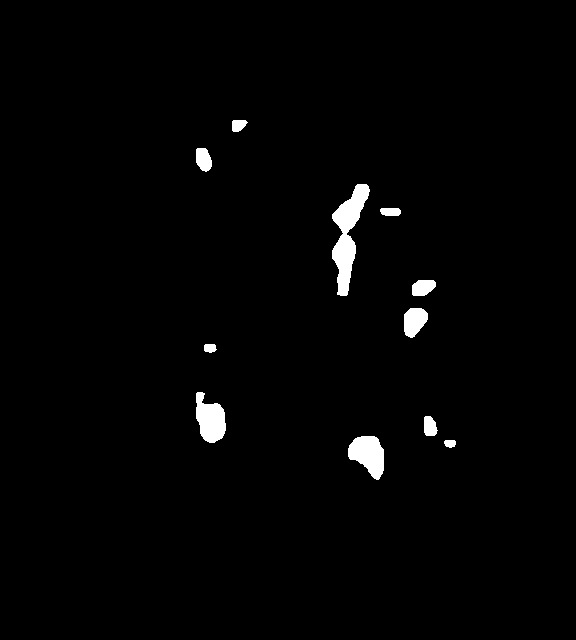

In [47]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_test[0]*255)

In [63]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 246ms/step - loss: 0.4744 - accuracy: 0.8750


[0.47435009479522705, 0.875]

In [67]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
